In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cv2.__version__

'3.4.2'

In [3]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 1. Contours

### 1.1 Finding and Drawing Contours

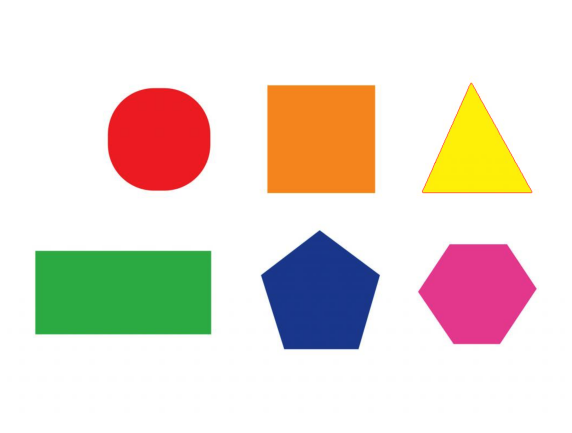

In [6]:
image = cv2.imread('../img/shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,230,255,0)
img, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

clone = image.copy()
clone = cv2.drawContours(clone, contours, 10, (0,0,255), 1)
show_image(np.flip(clone, axis=2))

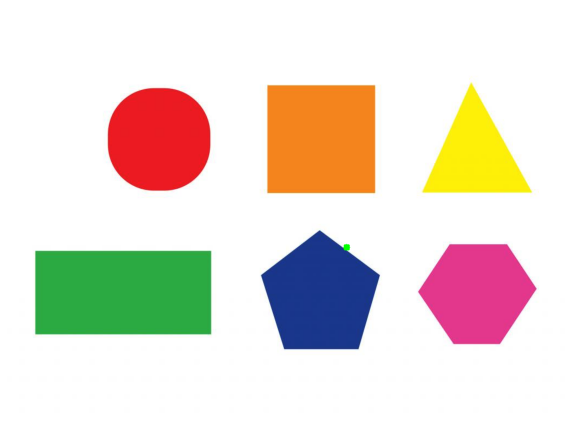

In [7]:
clone = image.copy()
cnt = contours[3]
clone = cv2.drawContours(clone.copy(), [cnt], 0, (0,255,0), 10)
show_image(np.flip(clone, axis=2))

### 1.2 Basic Contour Features

#### 1.2.1 Contour Area and Perimeter

Contour #1 -- area: 6008.00, perimeter: 449.82


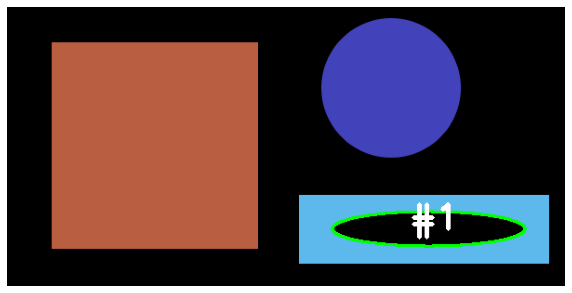

Contour #2 -- area: 19564.00, perimeter: 682.00


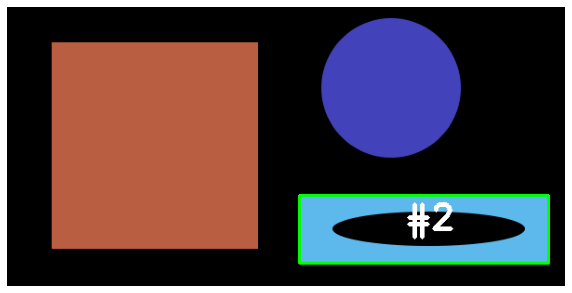

Contour #3 -- area: 48841.00, perimeter: 884.00


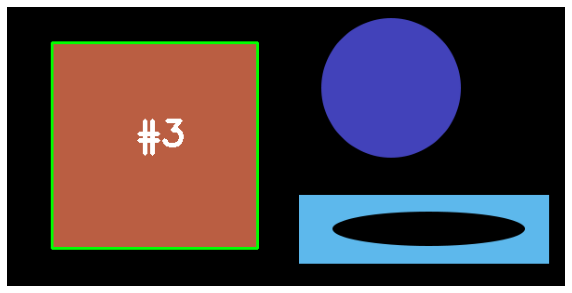

Contour #4 -- area: 17647.00, perimeter: 495.24


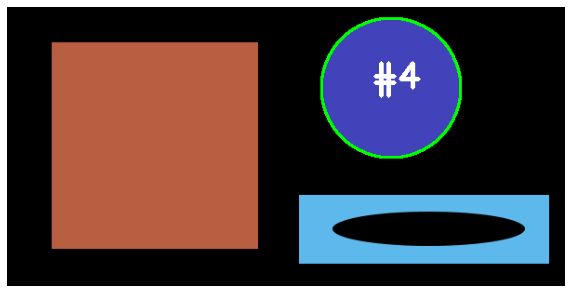

In [11]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[1]
cnt = contours[1]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
# loop over the contours again
for (i, c) in enumerate(contours):
    # compute the area and the perimeter of the contour
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    clone = image.copy()
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    show_image(clone)

#### 1.2.4 Contour Bounding Boxes

Contour #1


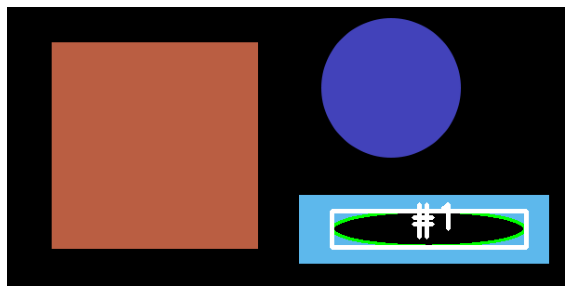

Contour #2


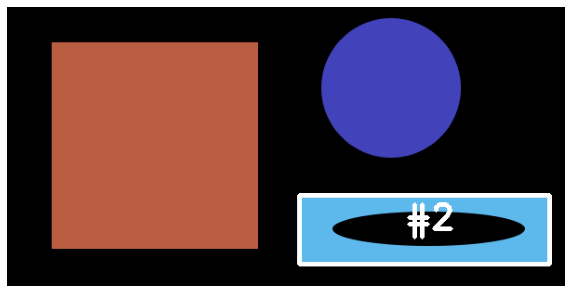

Contour #3


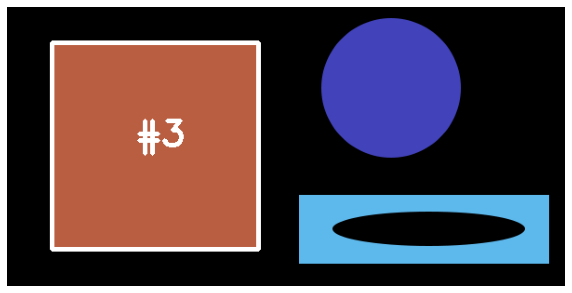

Contour #4


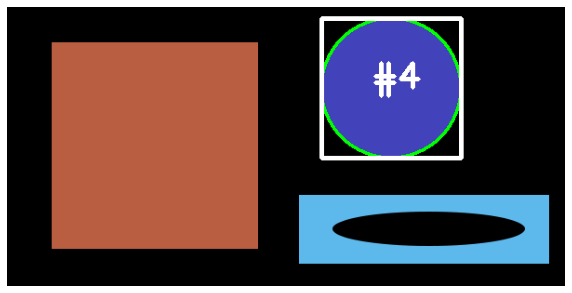

In [13]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[1]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    print("Contour #{}".format(i + 1))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(clone,(x,y),(x+w,y+h),(255,255,255),4)
    
    show_image(clone)

#### 1.2.5 Contour Minimum Enclosing Circles

Contour #1


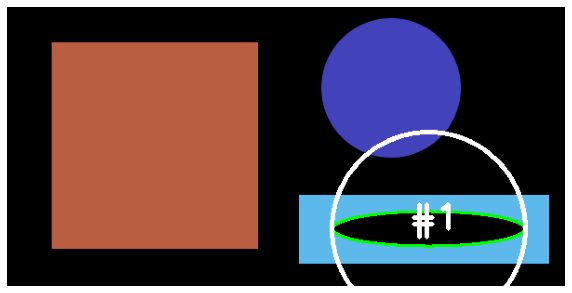

Contour #2


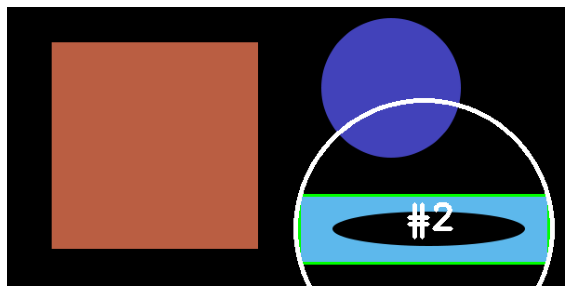

Contour #3


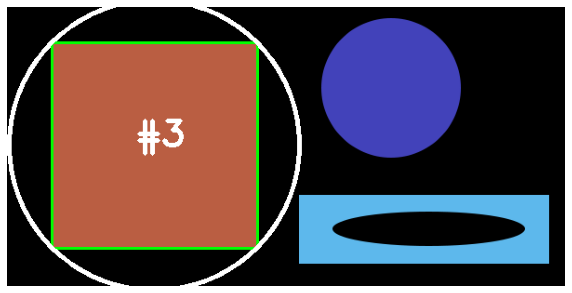

Contour #4


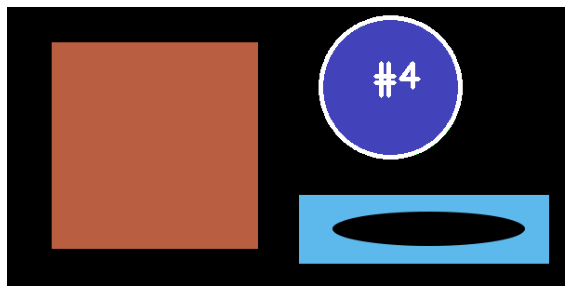

In [14]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[1]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    print("Contour #{}".format(i + 1))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    clone = cv2.circle(clone,center,radius,(255,255,255),4)
    
    show_image(clone)

#### 1.2.6 Fitting an Ellipse

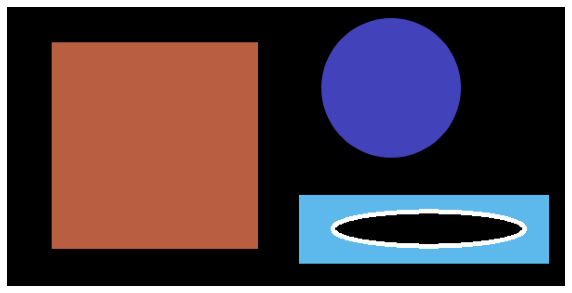

In [15]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[1]

ellipse = cv2.fitEllipse(contours[0])
cv2.ellipse(image,ellipse,(255,255,255),4)

show_image(image)

### EXERCISE: Fit a circle, bounding box and ellipse to objects of an image. What are their properties?

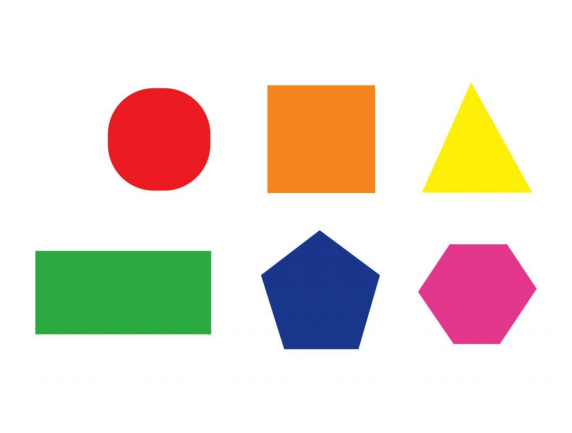

Contour #1 -- area: 786687.00, perimeter: 3584.00


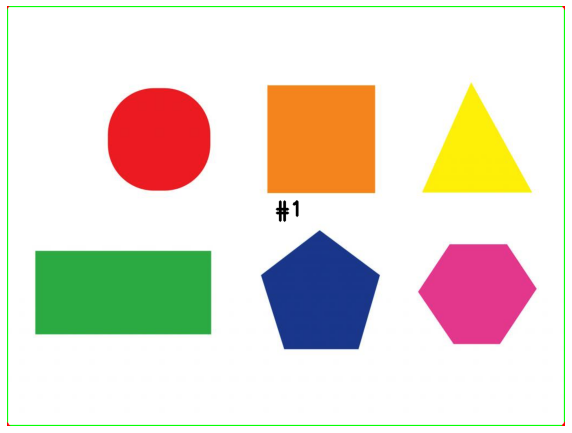

Contour #2 -- area: 2.00, perimeter: 5.66


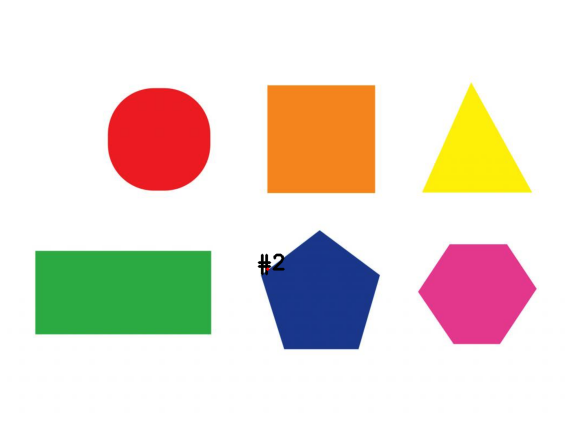

Contour #3 -- area: 49912.00, perimeter: 958.97


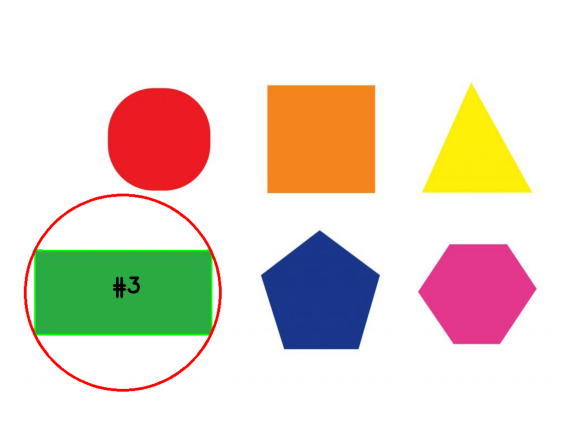

Contour #4 -- area: 2.00, perimeter: 5.66


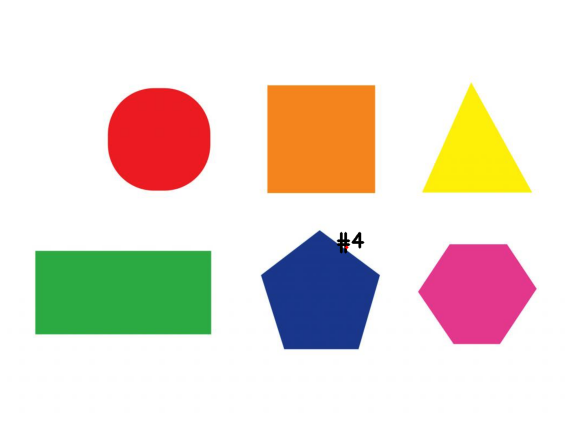

Contour #5 -- area: 29040.50, perimeter: 666.14


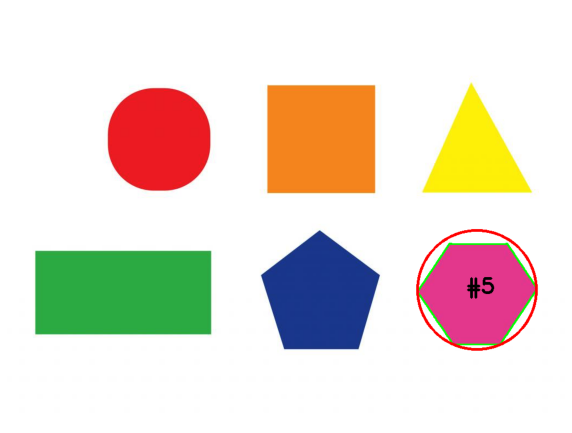

Contour #6 -- area: 33762.00, perimeter: 734.38


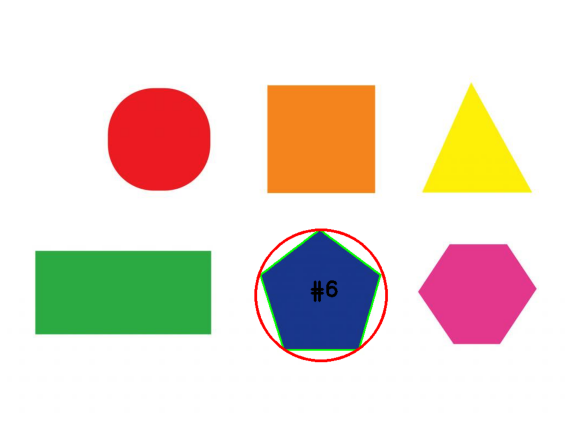

Contour #7 -- area: 2.00, perimeter: 5.66


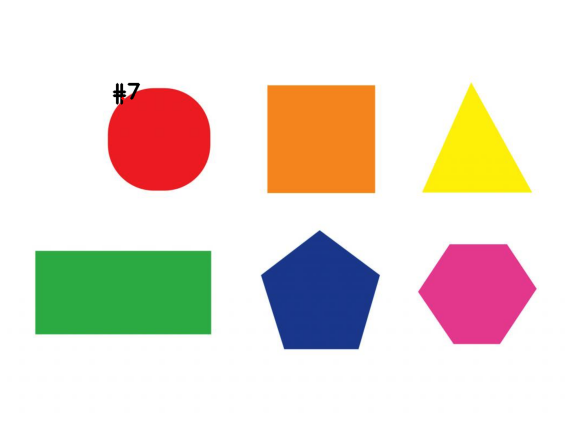

Contour #8 -- area: 2.00, perimeter: 5.66


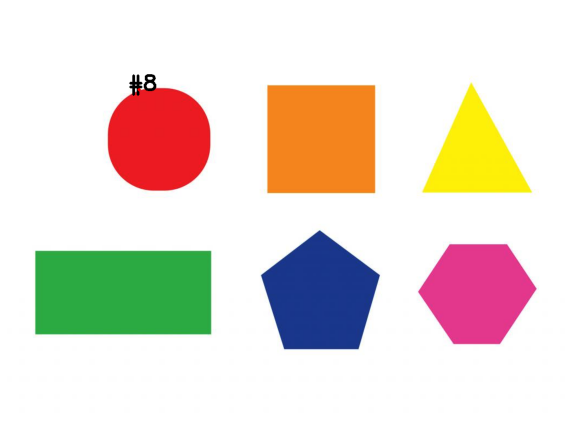

Contour #9 -- area: 29798.50, perimeter: 644.60


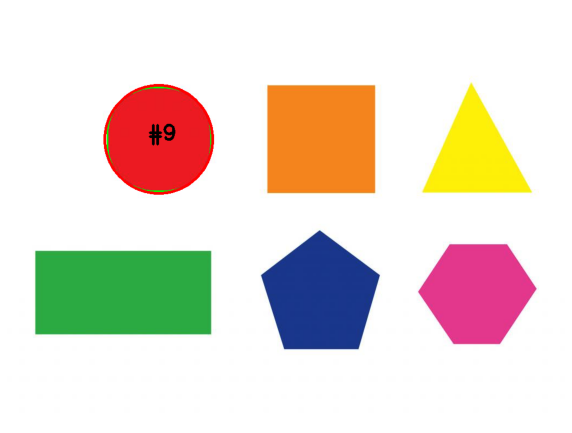

Contour #10 -- area: 39606.00, perimeter: 797.31


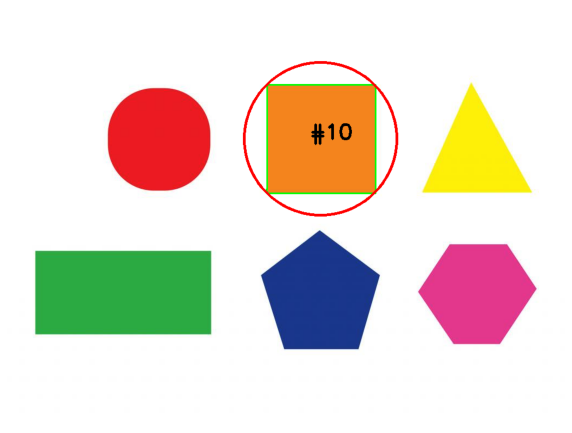

Contour #11 -- area: 20623.50, perimeter: 686.26


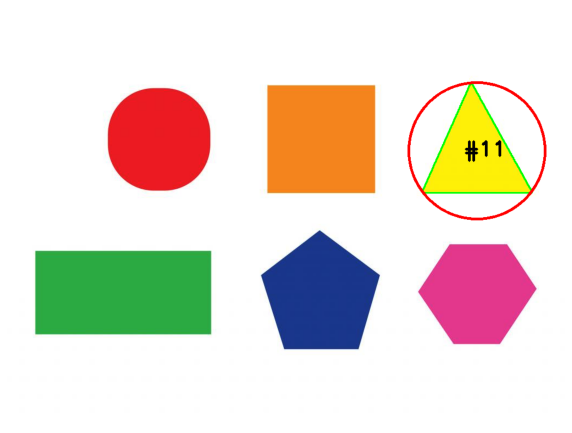

In [16]:
image = np.flip(cv2.imread('../img/shapes.png'), axis =2 )
show_image(image)

image = cv2.imread('../img/shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,230,255,0)
img , contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
# loop over the contours again
for (i, c) in enumerate(contours):
    # compute the area and the perimeter of the contour
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    clone = image.copy()
    print("Contour #{} -- area: {:.2f}, perimeter: {:.2f}".format(i + 1, area, perimeter))
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 0, 0), 4)
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    clone = cv2.circle(clone,center,radius,(0,0,255),4)
    show_image(np.flip(clone, axis=2))

### 1.3 Advanced Contour Features

#### 1.3.1 Aspect Ratio

Contour #1 -- aspect Ratio: 5.36


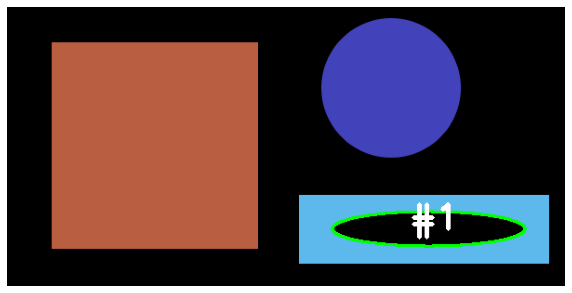

Contour #2 -- aspect Ratio: 3.64


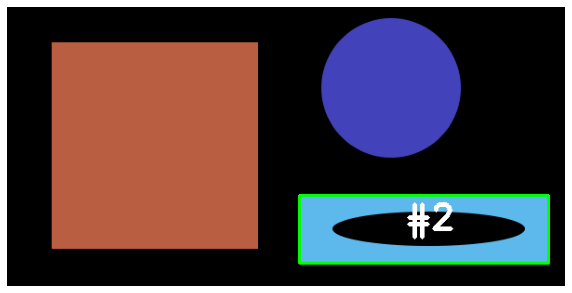

Contour #3 -- aspect Ratio: 1.00


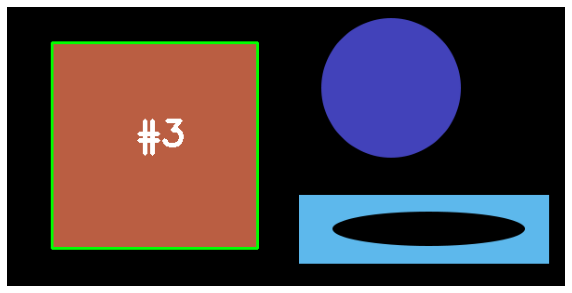

Contour #4 -- aspect Ratio: 1.00


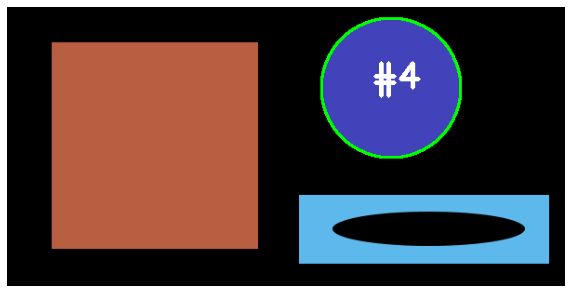

In [17]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[1]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # compute the area and the aspect ratio of the contour
    x,y,w,h = cv2.boundingRect(c)
    aspect_ratio = float(w)/h
    print("Contour #{} -- aspect Ratio: {:.2f}".format(i + 1, aspect_ratio))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    show_image(clone)

#### 1.3.2 Extent

Contour #1 -- area: 6008.00, Rectangular area: 8151.00, extent: 0.74


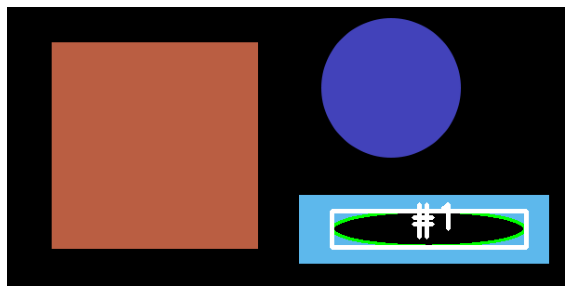

Contour #2 -- area: 19564.00, Rectangular area: 19906.00, extent: 0.98


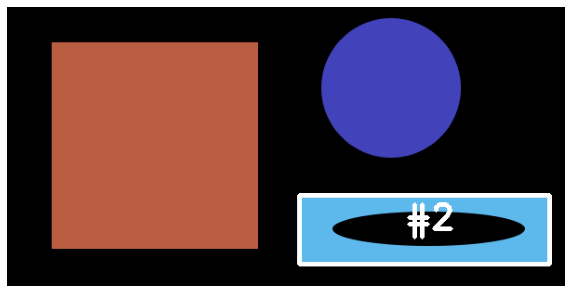

Contour #3 -- area: 48841.00, Rectangular area: 49284.00, extent: 0.99


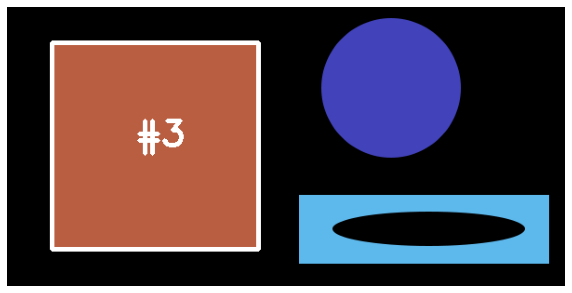

Contour #4 -- area: 17647.00, Rectangular area: 22500.00, extent: 0.78


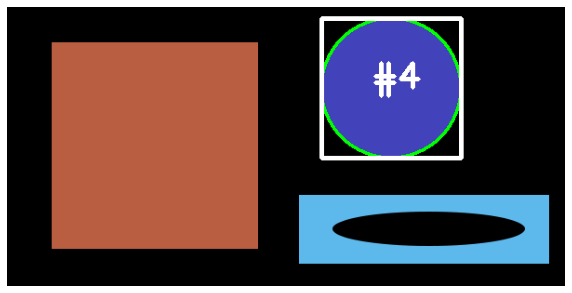

In [18]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, 1, 2)[1]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # compute the area and the aspect ratio of the contour
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    rect_area = w*h
    extent = float(area)/rect_area
    print("Contour #{} -- area: {:.2f}, Rectangular area: {:.2f}, extent: {:.2f}".format(i + 1, area, rect_area, extent))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 4)
    
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(clone,(x,y),(x+w,y+h),(255,255,255),4)
    
    show_image(clone)

#### 1.3.3 Convexity

Contour #1 -- Convex: True


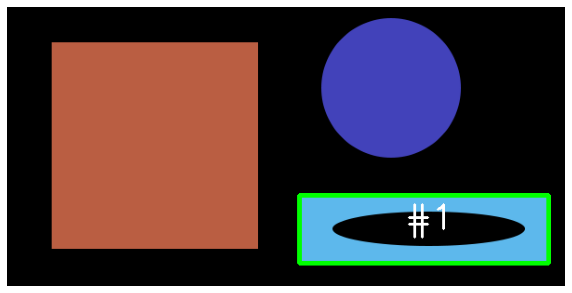

Contour #2 -- Convex: False


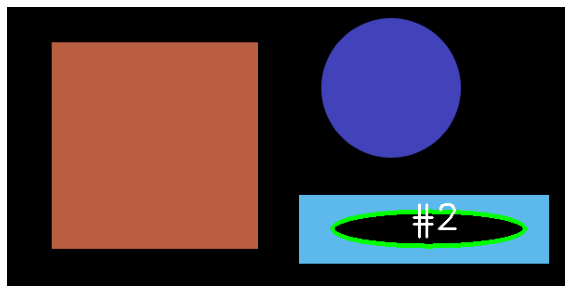

Contour #3 -- Convex: True


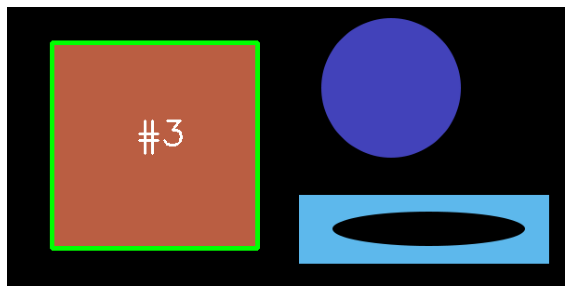

Contour #4 -- Convex: False


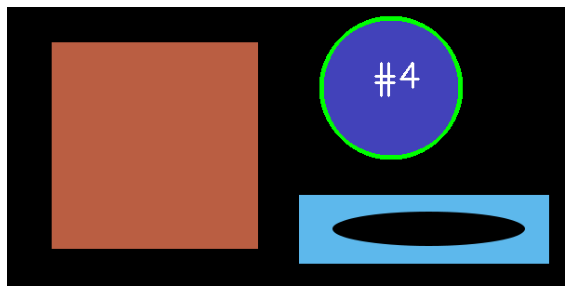

In [20]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    # Check convexity
    is_convex = cv2.isContourConvex(c)
    print("Contour #{} -- Convex: {}".format(i + 1, is_convex))
 
    # draw the contour on the image
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 4)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (255, 255, 255), 2)
    
    show_image(clone)

#### 1.3.4 Solidity

Contour #1 -- area: 3508.0, Hull Area: 4321.0, Solidity: 0.8118491090025457


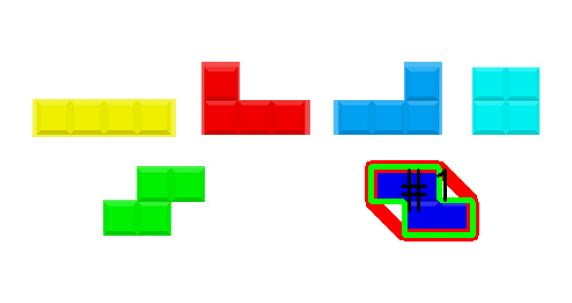

Contour #2 -- area: 3452.0, Hull Area: 4292.0, Solidity: 0.804287045666356


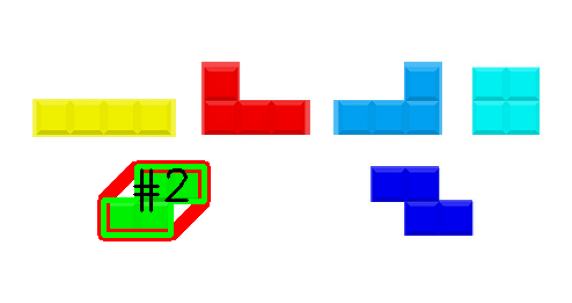

Contour #3 -- area: 3936.0, Hull Area: 3936.0, Solidity: 1.0


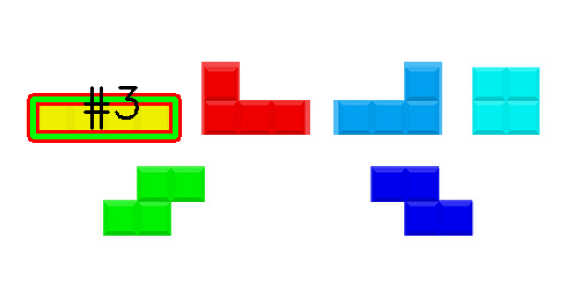

Contour #4 -- area: 3249.0, Hull Area: 3249.0, Solidity: 1.0


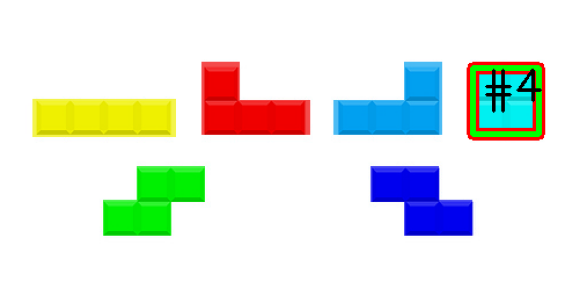

Contour #5 -- area: 3753.5, Hull Area: 4759.5, Solidity: 0.788633259796197


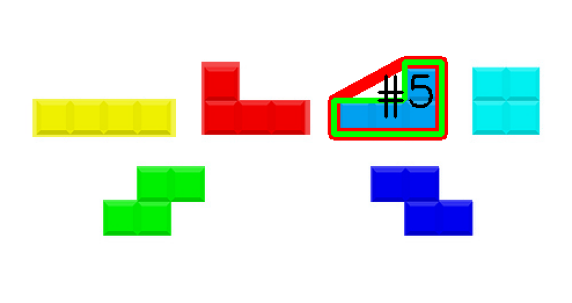

Contour #6 -- area: 3753.5, Hull Area: 4759.5, Solidity: 0.788633259796197


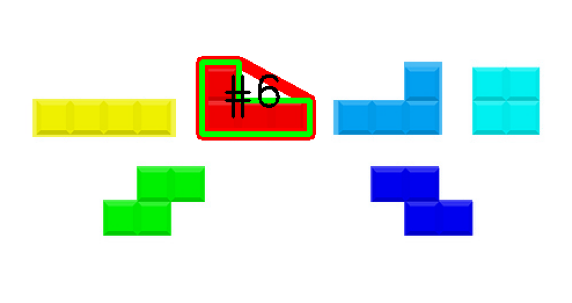

In [21]:
# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("../img/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

# loop over the contours again
for (i, c) in enumerate(contours):
    clone = image.copy()
    
    area = cv2.contourArea(c)
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    
    # Check convexity
    print(f"Contour #{i+1} -- area: {area}, Hull Area: {hull_area}, Solidity: {solidity}")
 
    # draw the contour and hull on the image
    cv2.drawContours(clone, [hull], -1, 255, 10)
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 4)
 
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 0, 0), 2)
    
    show_image(clone)

### 2. Identifying Shapes in Images using Contours

Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81
Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80
Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00
Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00
Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79
Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


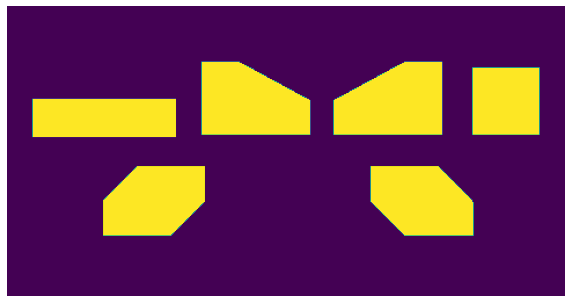

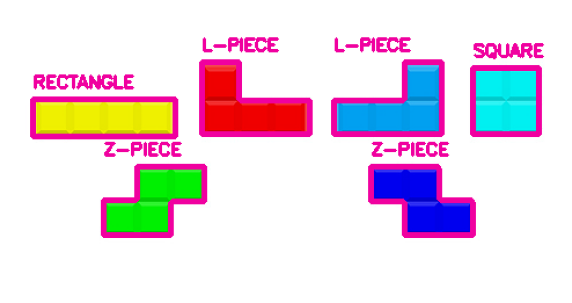

In [23]:
# load the Tetris block image, convert it to grayscale, and threshold
# the image
image = cv2.imread("../img/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
 
# show the original and thresholded images
cv2.imshow("Original", image)
cv2.imshow("Thresh", thresh)
 
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)

    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    
    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"

    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"

    # if the extent is sufficiently small, then we have a L-piece
    elif extent < 0.65:
        shape = "L-PIECE"

    # if the solidity is sufficiently large enough, then we have a Z-piece
    elif solidity > 0.80:
        shape = "Z-PIECE"

    # draw the shape name on the image
    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 2)

    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))

# show the output images
show_image(hullImage)
show_image(image)

### EXERCISE: Use contour properties to identify shape of objects in the following image

In [ ]:
image = np.flip(cv2.imread("../img/shapes.png"), axis = 2)
show_image(image)

Contour #1 -- aspect_ratio=2.10, extent=0.98, solidity=1.00
Contour #2 -- aspect_ratio=1.18, extent=0.71, solidity=0.99
Contour #3 -- aspect_ratio=1.00, extent=0.69, solidity=0.99
Contour #4 -- aspect_ratio=1.00, extent=0.82, solidity=0.99
Contour #5 -- aspect_ratio=1.00, extent=0.99, solidity=1.00
Contour #6 -- aspect_ratio=1.00, extent=0.50, solidity=0.99


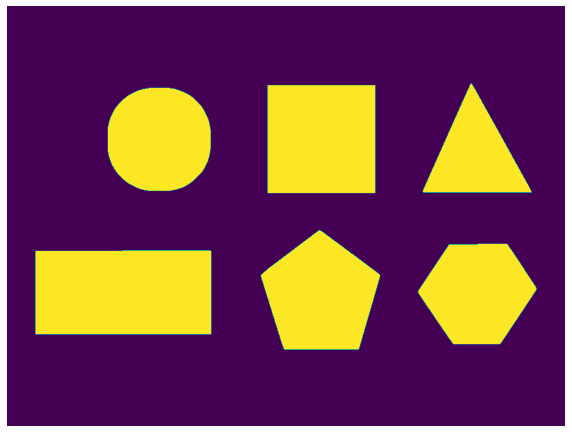

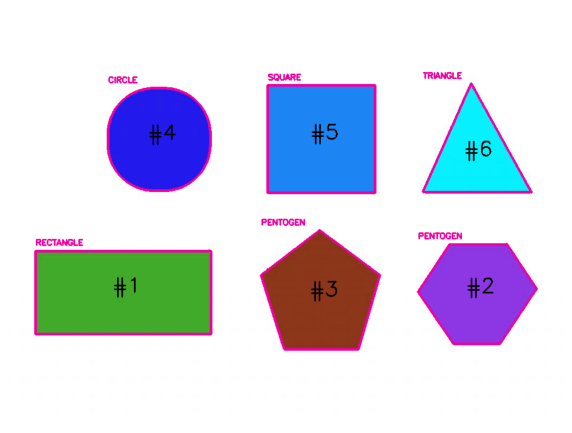

In [16]:
# TODO: Your code below

# load the Shapes image, convert it to grayscale, and threshold
# the image
image = cv2.imread("../img/shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
# show the original and thresholded images
cv2.imshow("Original", image)
cv2.imshow("Thresh", thresh)
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
hullImage = np.zeros(gray.shape[:2], dtype="uint8")
# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)
    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)
    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02 and extent >= 0.98:
        shape = "SQUARE"
    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 2.0:
        shape = "RECTANGLE"
    # if the extent is sufficiently small, then we have a Triangle
    elif extent <= 0.52:
        shape = "TRIANGLE"
    # if the solidity is sufficiently large enough, then we have a Pentogen
    elif extent >= 0.60 and extent <= 0.75 and solidity > 0.80:
        shape = "PENTOGEN"
    # if the solidity is sufficiently large enough, then we have a Circle
    elif extent >= 0.80 and extent <= 0.95:
        shape = "CIRCLE"
    # draw the shape name on the image
    cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
        (240, 0, 159), 2)
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 0, 0), 2)
    # show the contour properties
    print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
        .format(i + 1, aspectRatio, extent, solidity))
# show the output images
show_image(hullImage)
show_image(image)


### 1.4 Contour Retrieval Modes

RETR_LIST


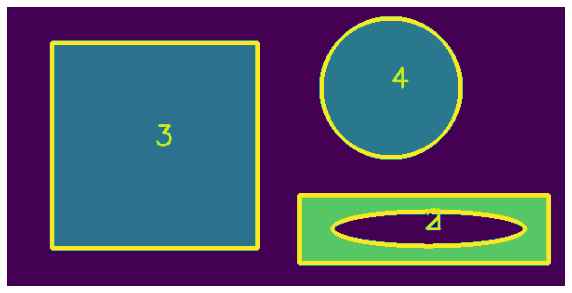

RETR_EXTERNAL


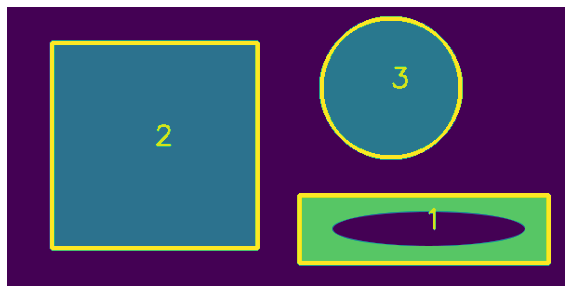

RETR_CCOMP


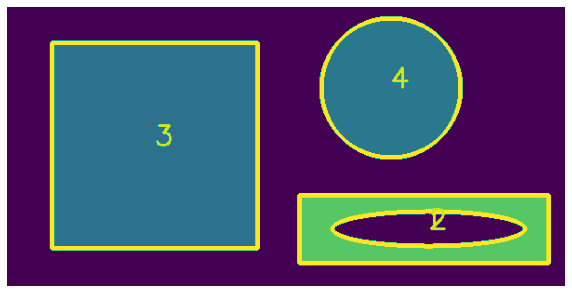

RETR_TREE


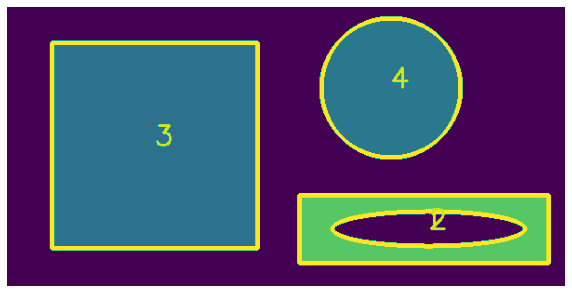

In [24]:
image = cv2.imread('../img/basic_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,10,255,0)

contour_retrieval_modes = [cv2.RETR_LIST, cv2.RETR_EXTERNAL, cv2.RETR_CCOMP, cv2.RETR_TREE]
names = ['RETR_LIST', 'RETR_EXTERNAL', 'RETR_CCOMP', 'RETR_TREE']

for rm, name in zip(contour_retrieval_modes, names):
    img = gray.copy()
    contours = cv2.findContours(thresh,rm,cv2.CHAIN_APPROX_SIMPLE)[1]
    
    for (i, c) in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(c)
        
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        cv2.drawContours(img, [c], -1, (255, 255, 255), 4)
        
        
        # draw the shape name on the image
        cv2.putText(img, str(i+1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (240, 0, 159), 2)
    
    print(name)
    show_image(img)

### PROJECT: Identify Xs and Os in the tic tac toe board

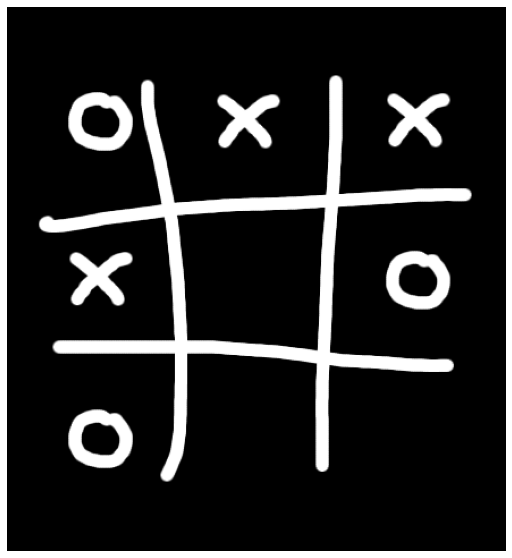

In [25]:
image = np.flip(cv2.imread("../img/tictactoe.png"), axis = 2)
show_image(image)

O (Contour #1) -- solidity=0.98
X (Contour #2) -- solidity=0.60
O (Contour #3) -- solidity=0.98
X (Contour #4) -- solidity=0.60
X (Contour #5) -- solidity=0.60
O (Contour #6) -- solidity=0.98
? (Contour #7) -- solidity=0.28


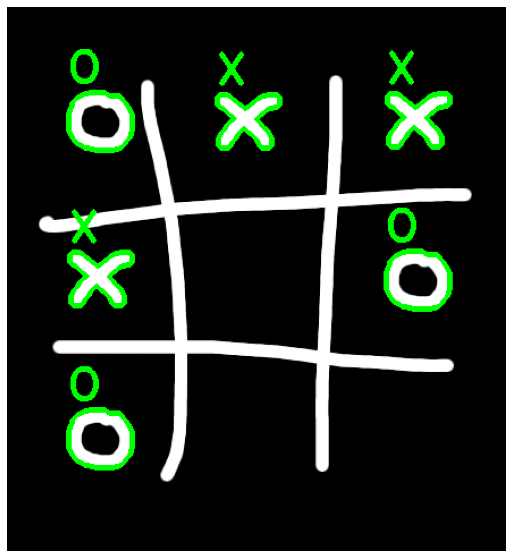

In [27]:
# %load ../solutions/tic-tac-toe.py
# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("../img/tictactoe.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
 
# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)

    # initialize the character text
    char = "?"

    # if the solidity is high, then we are examining an `O`
    if solidity > 0.9:
        char = "O"

    # otherwise, if the solidity it still reasonabably high, we
    # are examining an `X`
    elif solidity > 0.5:
        char = "X"

    # if the character is not unknown, draw it
    if char != "?":
        cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
        cv2.putText(image, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,
            (0, 255, 0), 4)

    # show the contour properties
    print("{} (Contour #{}) -- solidity={:.2f}".format(char, i + 1, solidity))
    
show_image(image)

### PROJECT: Use contour properties to identify licence plate in images

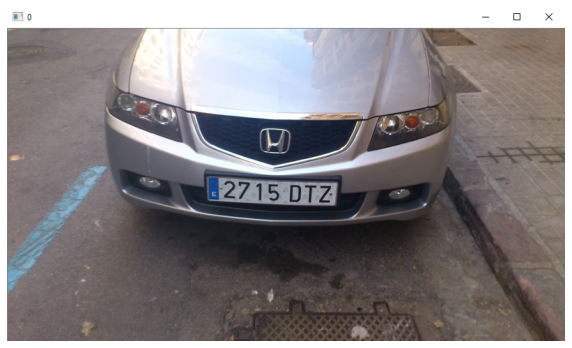

In [28]:
image = np.flip(cv2.imread("../img/licence_plate_raw.png"), axis = 2)
show_image(image)

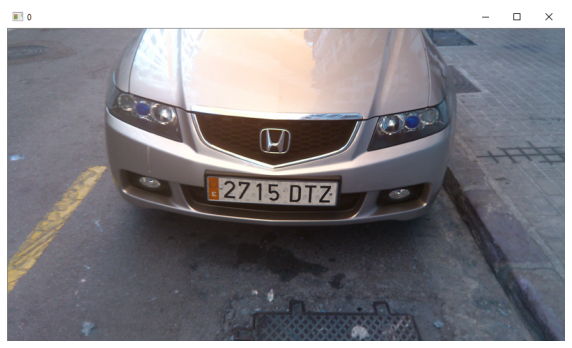

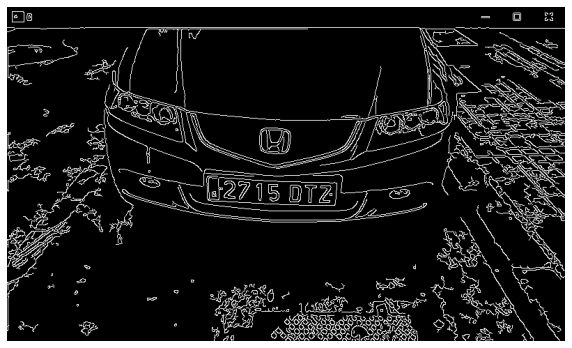

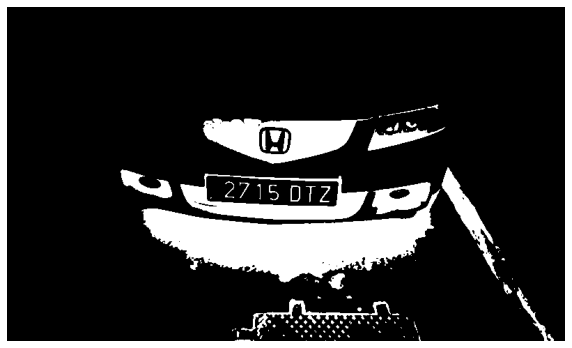

Contour #91 -- aspect_ratio=4.09, extent=0.74, solidity=0.90
Contour #101 -- aspect_ratio=3.65, extent=0.64, solidity=0.92


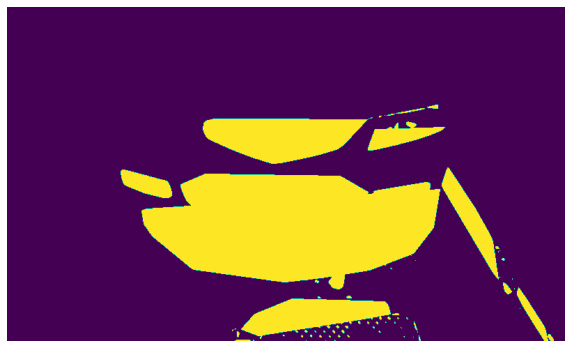

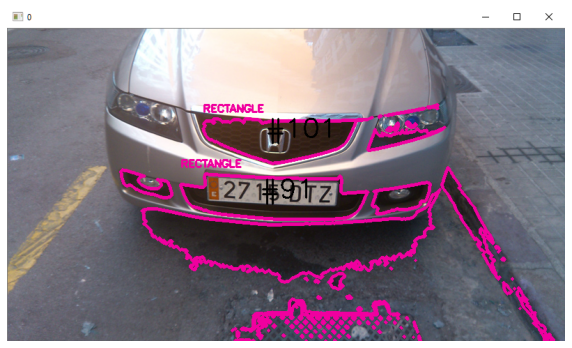

In [34]:
# TODO: Your code below



image = cv2.imread('../img/licence_plate_raw.png')
#image = cv2.imread('../img/licence_plate_raw_crop.png')
show_image(image)
# load the Shapes image, convert it to grayscale, and threshold
# the image
#image = cv2.imread("../img/shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
#eq = cv2.equalizeHist(gray)
eq = cv2.equalizeHist(blurred)
# compute a "wide", "mid-range", and "tight" threshold for the edges
#wide = cv2.Canny(blurred, 10, 200)
#mid = cv2.Canny(blurred, 30, 150)
mid = cv2.Canny(eq, 30, 150)
#tight = cv2.Canny(blurred, 240, 250)
#thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
#thresh = cv2.threshold(mid, 225, 255, cv2.THRESH_BINARY_INV)[1]
#thresh = cv2.threshold(eq, 100, 255, cv2.THRESH_BINARY_INV)[1]
thresh = cv2.threshold(eq, 35, 255, cv2.THRESH_BINARY_INV)[1]
#thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)[1]
#show_image(mid)
#cv2.imshow("Thresh", mid)
# show the original and thresholded images
#cv2.imshow("Original", image)
#cv2.imshow("Thresh", thresh)
#show_image(gray)
#show_image(blurred)
#show_image(eq)
show_image(mid, cmap='gray')
show_image(thresh, cmap='gray')
# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
#hullImage = np.zeros(gray.shape[:2], dtype="uint8")
hullImage = np.zeros(eq.shape[:2], dtype="uint8")
# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    # compute the aspect ratio of the contour, which is simply the width
    # divided by the height of the bounding box
    aspectRatio = w / float(h)
    # use the area of the contour and the bounding box area to compute
    # the extent
    extent = area / float(w * h)
    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    if hullArea > 0:
        solidity = area / float(hullArea)
    # visualize the original contours and the convex hull and initialize
    # the name of the shape
    cv2.drawContours(hullImage, [hull], -1, 255, -1)
    cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
    shape = ""
    # if the aspect ratio is approximately one, then the shape is a square
    if aspectRatio >= 0.98 and aspectRatio <= 1.02 and extent >= 0.98:
        shape = "SQUARE"
    # if the width is 3x longer than the height, then we have a rectangle
    elif aspectRatio >= 2.0:
        shape = "RECTANGLE"
    # if the extent is sufficiently small, then we have a Triangle
    elif extent <= 0.52:
        shape = "TRIANGLE"
    # if the solidity is sufficiently large enough, then we have a Pentogen
    elif extent >= 0.60 and extent <= 0.75 and solidity > 0.80:
        shape = "PENTOGEN"
    # if the solidity is sufficiently large enough, then we have a Circle
    elif extent >= 0.80 and extent <= 0.95:
        shape = "CIRCLE"
    # draw the shape name on the image
    if aspectRatio >= 2.0 and solidity > 0.50 and extent > 0.50:
        cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
            (240, 0, 159), 2)
    # compute the center of the contour and draw the contour number
    M = cv2.moments(c)
    if M["m00"] > 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    if aspectRatio >= 2.0 and solidity > 0.50 and extent > 0.50:
        cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
            1.25, (0, 0, 0), 2)
    # show the contour properties
    if aspectRatio >= 2.0 and solidity > 0.50 and extent > 0.50:
        print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
            .format(i + 1, aspectRatio, extent, solidity))
# show the output images
show_image(hullImage)
show_image(image)